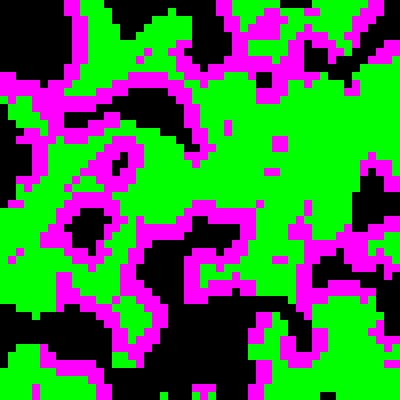

part1: 745008 745008


In [1]:
import re
import sys
import cv2
import time
import copy
import numpy as np
from PIL import Image
from IPython import display

C={}
C['#']=[255,0,255]
C['|']=[0,255,0]
C['.']=[0,0,0]

def printmap(M):
    w=len(M[0])
    h=len(M)
    pix = np.zeros([h,w,3]).astype(np.ubyte)
    for y in range(h):
        for x in range(w):
            pix[y,x,:]=C[M[y][x]]
    
    F=8
    pix = cv2.resize(pix, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
    
    display.clear_output(wait=True)
    
    display.display(Image.fromarray(pix, 'RGB'))

def ld():
    return [list(l.strip()) for l in open("18.txt").readlines()]
M=ld()
printmap(M)
time.sleep(1)
def evolve(M):
    N=copy.deepcopy(M)
    w=len(M[0])
    h=len(M)
    for y in range(h):
        for x in range(w):
            t=0
            l=0
            for xx in [-1,0,1]:
                for yy in [-1,0,1]:
                    if not (xx==0 and yy==0):
                        xxx=x+xx
                        yyy=y+yy
                        if xxx>=0 and xxx<w:
                            if yyy>=0 and yyy<h:
                                if M[yyy][xxx]=='#':
                                    l+=1
                                if M[yyy][xxx]=='|':
                                    t+=1
            if M[y][x]=='#':
                if t==0 or l==0:
                    N[y][x]='.'
            elif M[y][x]=='|':
                if l>2:
                    N[y][x]='#'
            elif M[y][x]=='.':
                if t>2:
                    N[y][x]='|'
                                
    
    return N

def count(M,s):
    return sum([l.count(s) for l in M])


for i in range(10):
    M=evolve(M)
    printmap(M)
    time.sleep(0.2)
    
def value(M):
    return count(M,'|')*count(M,'#')
    
    
print("part1:", value(M),745008)
    

In [2]:
def H(M):
    return "".join(["".join(l) for l in M])

M=ld()


a=0
LN=1_000_000_000

def spd(M, LN):
    a=0
    hash_ages={}
    hash_ages[H(M)]=a
    hash_values=[value(M)]
    while a < LN:
        M=evolve(M)
        a+=1
        hv=H(M)
        hash_values.append(value(M))
        if hv in hash_ages:
            b=hash_ages[hv]
            period=a-b
            ix=b+(LN-b)%(period)
            return hash_values[ix]
        hash_ages[hv]=a
    return value(M)

print("part2: ", spd(M,LN), 219425)

    

part2:  219425 219425
